In [1]:
%load_ext autoreload
%autoreload 2

import gtab
import matplotlib.pyplot as plt
import gensim.downloader
from gensim.similarities.fastss import FastSS
import numpy as np
from gensim.models import KeyedVectors
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from get_related_words import get_hypernyms
from get_related_words import get_hyponyms
from get_related_words import get_synonyms
from get_related_words import get_wordnet_path_similarity
from get_related_words import get_similar_words

## Overall Model Results
We are using a three step process to find popular, relevant terms.
 
1. Word Embeddings - using a model trained on a relevant data source, we can extract words used with a high cosine similarity to the search terms. This is where we get our popular terms, the terms being used. 

2. Edit Distance: using the levenstein edit distance, we are dropping terms that are matches to the search terms, but plural or mispelt. 
    
3. Lexical Database - we then leverage a lexical database to both rank and group words based on path distance. 

In [2]:
from get_related_words_test import get_similar_words

In [3]:
# returns the semantically related terms that will be provided by the cloud 
# application for forecasting

get_similar_words('Lemonade', n_words=25)

Loading saved model...


{'lemonade': ['orangeade',
  'limeade',
  'beverage',
  'tea',
  'coffee',
  'cider',
  'spritzer',
  'seltzer',
  'schnapps',
  'juice',
  'gin',
  'cocktail',
  'brandy',
  'beer',
  'snack',
  'martini',
  'margarita',
  'eggnog',
  'daiquiri',
  'vinegar',
  'syrup',
  'sundaes',
  'sherbet',
  'popsicles',
  'lollipops']}

## Exploring WordNet 
WordNet is a lexical database that follows a tree-like structure. Hypernyms move up in the tree (e.g. fruit_drink is a hypernym to lemonade) while hyponyms move down in the tree (e.g. lemonade and orangade are hyponyms to fruit_drink). Synonyms are on the same level (have a common hypernym) within the tree. The path distance provides a measure of distance for one term to another in the overall tree structure.

In [4]:
# retrive the hypernym for a term
hypernyms = get_hypernyms('coffee')
print('hypernyms: {}'.format(hypernyms))

hypernyms: beverage


In [5]:
# retrive the synonyms for a term
synonyms = get_synonyms('coffee')
print('synonyms: {}'.format(synonyms))

synonyms: [['java'], ['coffee_tree'], ['coffee_bean', 'coffee_berry'], ['burnt_umber', 'chocolate', 'deep_brown', 'umber']]


In [6]:
# retrive the hyponyms for a term
hyponyms = get_hyponyms('coffee')
print('hyponyms: {}'.format(hyponyms))

hyponyms: [['cappuccino', 'cappuccino_coffee', 'coffee_cappuccino'], ['cafe_royale', 'coffee_royal'], ['Turkish_coffee'], ['instant_coffee'], ['mocha', 'mocha_coffee'], ['drip_coffee'], ['espresso'], ['Irish_coffee'], ['cafe_au_lait'], ['coffee_substitute'], ['iced_coffee', 'ice_coffee'], ['cafe_noir', 'demitasse'], ['decaffeinated_coffee', 'decaf']]


In [7]:
# return the path distance within WordNet
term1 = 'beverage'
term2 = 'mocha'
dist = get_wordnet_path_similarity(term1, term2)
print('The path distance between {} and {} is {}.'.format(term1, term2, dist))

The path distance between beverage and mocha is 0.1.


## Visualizing Cosine Similarity Results

In order to visualize the cosine similarity of words we need to first reduce the number of dimensions using PCA. We can then chart them on a scatterplot. 

In [8]:
# extract the word embedding model results without the edit and path distance components of the overall NLP portion
model_path = '../cdebski/wiki_word_embeddings'
search_word = 'Ice Cream'

# remove spaces from phrases
search_word = search_word.replace(" ","").lower()

# retrive word embeddings model
if os.path.exists(model_path):
    # load the model from local file
    print("Loading saved model...")
    model = KeyedVectors.load(model_path)

else:
    # download and save the model if not available
    print("Downloading model...")
    model = gensim.downloader.load('fasttext-wiki-news-subwords-300')
    model.save(model_path)

# safe retrival of the most similar words. Will return itself if the word is not in its vocabulary
try:
    word_cosine = model.most_similar(search_word, topn=25)

except KeyError:
    word_cosine = [(search_word, 1)]

print(word_cosine)

Loading saved model...
[('icecreams', 0.8418611884117126), ('ice-cream', 0.8290021419525146), ('Icecream', 0.7736142873764038), ('ice-creams', 0.7453774809837341), ('Ice-cream', 0.7384599447250366), ('icecube', 0.7137746214866638), ('ice-', 0.6846408247947693), ('ice', 0.6809401512145996), ('ice-box', 0.6777350902557373), ('ice-cube', 0.6772070527076721), ('ice-water', 0.6720316410064697), ('ice-pack', 0.6456763744354248), ('slushie', 0.6299453377723694), ('ice-berg', 0.6293495893478394), ('ice-rink', 0.6291958093643188), ('popsicle', 0.6275215744972229), ('ice-melt', 0.6272243857383728), ('ice-bucket', 0.6266813278198242), ('ice-skate', 0.6247037649154663), ('ice-cubes', 0.6243662238121033), ('ices', 0.6242417097091675), ('milkshake', 0.6235678195953369), ('sundaes', 0.6233888268470764), ('creamer', 0.6230928301811218), ('iceman', 0.6225195527076721)]


In [9]:
# extract the word vector for the similar terms
words = [search_word] + [w for w, _ in word_cosine]  # Include the original word
vectors = [model[w] for w in words]
print(vectors)

[array([-3.0049e-02, -2.5257e-02, -1.2172e-01, -1.3331e-02, -2.6942e-02,
       -6.0681e-02, -2.9411e-02, -6.3157e-02,  4.3346e-02,  1.5407e-02,
        8.2820e-03, -4.5641e-02, -4.0328e-03, -4.6289e-02,  6.4962e-03,
        2.7820e-02,  1.8312e-02, -3.0570e-02,  2.3004e-02,  2.5526e-02,
       -2.0164e-02,  9.9495e-02,  5.4291e-03, -1.2148e-02,  3.1547e-02,
        5.5356e-02,  5.2029e-02,  3.7901e-02,  5.9188e-02, -1.3757e-02,
        1.0797e-02, -2.9515e-02,  2.4370e-02,  5.5932e-02, -2.9613e-03,
       -2.6210e-02,  5.9131e-02, -1.0482e-01, -2.1601e-03,  2.0353e-02,
       -2.2122e-02, -1.1457e-01, -8.6518e-02, -6.4152e-02,  9.8499e-02,
        2.7020e-02, -2.4176e-02, -5.1174e-02, -5.7857e-02,  3.7740e-02,
        6.5989e-02,  3.3393e-02,  5.4326e-02, -5.0463e-02, -3.0870e-02,
       -4.4087e-02,  2.4738e-02, -5.4909e-02, -8.7812e-02, -2.8580e-02,
       -1.9607e-03, -2.1376e-02,  3.2209e-02,  2.0115e-02, -1.6762e-02,
        4.1294e-02,  1.9976e-02,  5.1560e-03, -3.1943e-02,  2.2

In [10]:
# reduce to two dimension for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

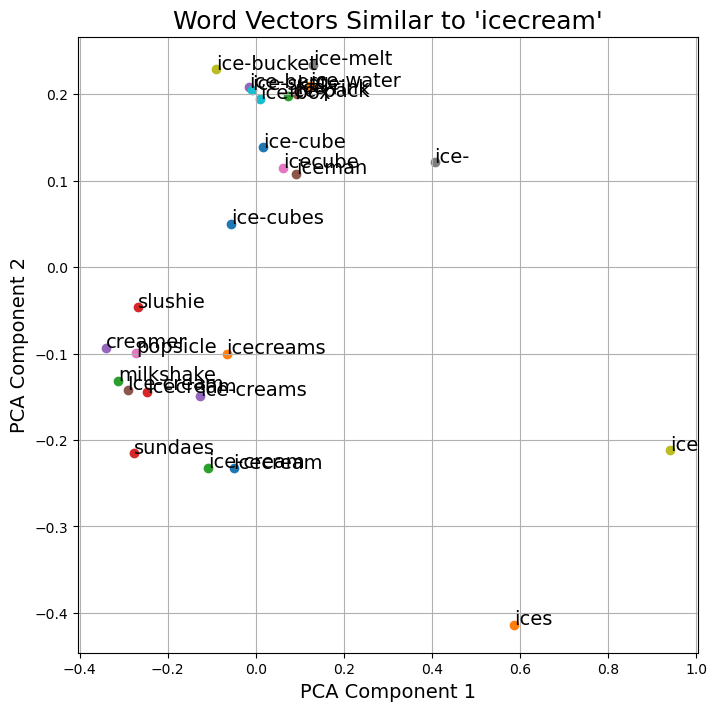

In [17]:
# visualize the results
plt.figure(figsize=(8, 8))
for i, label in enumerate(words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.text(x, y, label, fontsize=14)

plt.title(f"Word Vectors Similar to '{search_word}'", fontsize=18)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.grid()
plt.show()